In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_fut=pd.read_parquet("trades_fut.parquet",engine='pyarrow')
df_fut['timestamp']=pd.to_datetime(df_fut['exch_ts'], unit='ns')
df_fut.set_index('timestamp',inplace=True)
df_fut.head(5)

,exch_ts,side,price,qty,rcv_ts
timestamp,,,,,
2021-03-31 23:59:59.975,1617235199975000000,1,1923.07,0.003,1617235200076585984
2021-04-01 00:00:00.075,1617235200075000000,1,1923.07,0.003,1617235200099248896
2021-04-01 00:00:01.105,1617235201105000000,-1,1923.06,0.188,1617235201726001152
2021-04-01 00:00:01.105,1617235201105000000,-1,1923.06,0.010,1617235201726599936
2021-04-01 00:00:01.105,1617235201105000000,-1,1923.06,0.010,1617235201726608128


In [62]:
df_fut_new=df_fut.copy()
df_fut_new['b_price']=(df_fut_new['side']+1)*df_fut_new['price']/2
df_fut_new['b_price']=df_fut_new['b_price'].replace({0:np.nan})
df_fut_new.bfill(inplace=True)

df_fut_new['s_price']=(df_fut_new['side']-1)*df_fut_new['price']/(-2)
df_fut_new['s_price']=df_fut_new['s_price'].replace({0:np.nan})
df_fut_new.bfill(inplace=True)

df_fut_new['spread']=2*(df_fut_new['b_price']-df_fut_new['s_price'])/(df_fut_new['b_price']+df_fut_new['s_price'])*10000

df_fut_new.tail(10)

,exch_ts,side,price,qty,rcv_ts,b_price,s_price,spread
timestamp,,,,,,,,
2021-04-01 23:59:59.188,1617321599188000000,1,1969.49,0.235,1617321599199507968,1969.49,1969.53,-0.203096
2021-04-01 23:59:59.246,1617321599246000000,1,1969.49,0.059,1617321599257204992,1969.49,1969.53,-0.203096
2021-04-01 23:59:59.246,1617321599246000000,1,1969.49,0.037,1617321599257221888,1969.49,1969.53,-0.203096
2021-04-01 23:59:59.246,1617321599246000000,1,1969.49,0.007,1617321599257530880,1969.49,1969.53,-0.203096
2021-04-01 23:59:59.282,1617321599282000000,-1,1969.53,1.950,1617321599294321920,1969.54,1969.53,0.050773
2021-04-01 23:59:59.806,1617321599806000000,1,1969.54,0.150,1617321599817417984,1969.54,NaN,NaN
2021-04-01 23:59:59.806,1617321599806000000,1,1969.54,0.358,1617321599817487872,1969.54,NaN,NaN
2021-04-01 23:59:59.806,1617321599806000000,1,1969.54,0.042,1617321599817506048,1969.54,NaN,NaN
2021-04-01 23:59:59.901,1617321599901000000,1,1969.72,0.240,1617321599913532928,1969.72,NaN,NaN


In [ ]:
Видим, что последняя цена продажи была 1969.53

In [26]:
from tqdm import tqdm

In [30]:
a=0.06 #if less, than buy
b=0.7 #if bigger, than sell

tek_money=2000
tek_amt=0
for i in tqdm(range(len(df_fut_new))):
    #print(i,tek_amt,tek_money)
    if (df_fut_new['spread'][i] <=a):
        if (tek_money//df_fut_new['price'][i] >=1):
            tek_amt+=tek_money//df_fut_new['price'][i]
            tek_money-=tek_money//df_fut_new['price'][i]*df_fut_new['price'][i]
    elif (df_fut_new['spread'][i] >=b):
        tek_money+=tek_amt*df_fut_new['price'][i]
        tek_amt=0

print(i,tek_amt,tek_money, tek_money+tek_amt*1969.53)


 11%|█▏        | 212343/1864887 [00:13<01:34, 17425.16it/s]


 24%|██▍       | 450071/1864887 [00:26<01:32, 15217.37it/s]


 34%|███▍      | 642655/1864887 [00:40<01:14, 16386.04it/s]


 45%|████▍     | 831250/1864887 [00:56<01:02, 16443.55it/s]


 54%|█████▍    | 1010040/1864887 [01:10<00:47, 17934.81it/s]


 67%|██████▋   | 1241009/1864887 [01:24<00:36, 17118.07it/s]


 78%|███████▊  | 1459857/1864887 [01:37<00:24, 16304.69it/s]


 90%|█████████ | 1686687/1864887 [01:50<00:09, 17936.26it/s]


100%|██████████| 1864887/1864887 [02:00<00:00, 15488.18it/s]

1864886 1.0 17.859999999977617 1987.3899999999776


In [39]:
a=-10 #if less, than buy
b=10 #if bigger, than sell

tek_money=2000
tek_amt=0
for i in tqdm(range(len(df_fut_new))):
    #print(i,tek_amt,tek_money)
    if (df_fut_new['spread'][i] <=a):
        if (tek_money//df_fut_new['price'][i] >=1):
            tek_amt+=tek_money//df_fut_new['price'][i]
            tek_money-=tek_money//df_fut_new['price'][i]*df_fut_new['price'][i]
    elif (df_fut_new['spread'][i] >=b):
        tek_money+=tek_amt*df_fut_new['price'][i]
        tek_amt=0

print(i,tek_amt,tek_money, tek_money+tek_amt*1969.53)


 13%|█▎        | 240481/1864887 [00:13<01:26, 18731.24it/s]


 24%|██▍       | 447719/1864887 [00:28<01:33, 15081.94it/s]


 36%|███▌      | 673817/1864887 [00:42<01:03, 18625.52it/s]


 49%|████▉     | 912918/1864887 [00:55<00:57, 16458.55it/s]


 61%|██████▏   | 1146840/1864887 [01:08<00:38, 18524.00it/s]


 74%|███████▍  | 1383395/1864887 [01:22<00:28, 16795.89it/s]


 87%|████████▋ | 1618353/1864887 [01:35<00:12, 18984.54it/s]


 99%|█████████▉| 1854344/1864887 [01:48<00:00, 18288.83it/s]


100%|██████████| 1864887/1864887 [01:49<00:00, 17096.25it/s]

1864886 0 2027.3399999999997 2027.3399999999997


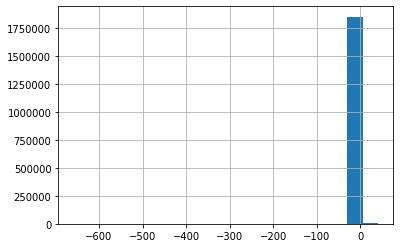

In [38]:
df_fut_new['spread'].hist(bins=20)

In [40]:
df_fut_new['spread'].min()

-658.4362139917697

In [41]:
df_fut_new['spread'].max()

40.662981088277036

In [78]:
df_fut2=df_fut.copy()
df_fut2.drop(columns=['rcv_ts'],inplace=True)
df_fut2=df_fut2.groupby(by=['exch_ts','side','price']).sum()
df_fut2.reset_index(inplace=True)

df_fut2['timestamp']=pd.to_datetime(df_fut2['exch_ts'], unit='ns')
df_fut2.set_index('timestamp',inplace=True)
df_fut2.drop(columns=['exch_ts'],inplace=True)
df_fut2.head(5)


,side,price,qty
timestamp,,,
2021-03-31 23:59:59.975,1,1923.07,0.003
2021-04-01 00:00:00.075,1,1923.07,0.003
2021-04-01 00:00:01.105,-1,1922.81,4.004
2021-04-01 00:00:01.105,-1,1922.82,2.601
2021-04-01 00:00:01.105,-1,1922.87,0.584


In [91]:
df_fut2['b_price']=(df_fut2['side']+1)/2*df_fut2['price']
df_fut2['b_price']=df_fut2['b_price'].replace({0:np.nan})
df_fut2.bfill(inplace=True)

df_fut2['s_price']=(df_fut2['side']-1)/(-2)*df_fut2['price']
df_fut2['s_price']=df_fut2['s_price'].replace({0:np.nan})
df_fut2.bfill(inplace=True)

df_fut2['b_price2']=(df_fut2['side']+1)/2*df_fut2['price']
df_fut2['b_price2']=df_fut2['b_price2'].replace({0:np.nan})


df_fut2['s_price2']=(df_fut2['side']-1)/(-2)*df_fut2['price']
df_fut2['s_price2']=df_fut2['s_price2'].replace({0:np.nan})


df_fut2['spread']=2*(df_fut2['b_price']-df_fut2['s_price'])/(df_fut2['b_price']+df_fut2['s_price'])*10000
df_fut2.tail(100)

,side,price,qty,b_price,s_price,spread,b_price2,s_price2
timestamp,,,,,,,,
2021-04-01 23:59:55.751,1,1969.04,0.030,1969.04,1969.86,-4.163599,1969.04,NaN
2021-04-01 23:59:55.879,1,1969.34,0.400,1969.34,1969.86,-2.640130,1969.34,NaN
2021-04-01 23:59:55.893,1,1969.34,0.152,1969.34,1969.86,-2.640130,1969.34,NaN
2021-04-01 23:59:55.893,1,1969.35,0.300,1969.35,1969.86,-2.589352,1969.35,NaN
2021-04-01 23:59:55.893,1,1969.38,0.548,1969.38,1969.86,-2.437018,1969.38,NaN
2021-04-01 23:59:56.001,1,1969.34,0.249,1969.34,1969.86,-2.640130,1969.34,NaN
2021-04-01 23:59:56.001,1,1969.38,0.060,1969.38,1969.86,-2.437018,1969.38,NaN
2021-04-01 23:59:56.001,1,1969.45,0.623,1969.45,1969.86,-2.081583,1969.45,NaN
2021-04-01 23:59:56.001,1,1969.46,0.161,1969.46,1969.86,-2.030807,1969.46,NaN


In [89]:
(df_fut2['s_price'] > df_fut2['b_price']).astype(int).values.sum()

417155

In [60]:
df_fut2.shape

(1864887, 5)

In [61]:
df_fut.shape

(1864887, 5)

In [87]:
(df_fut2['spread']<0).sum()

417155

In [92]:
df_fut2['spread'].min()

-658.4362139917697

In [93]:
df_fut2['spread'].max()

40.662981088277036

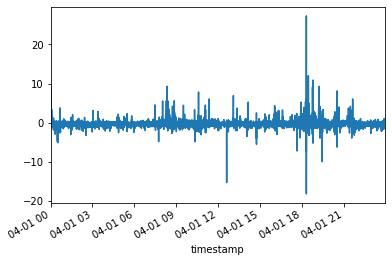

In [97]:
df_fut2['spread'].rolling(window=100).mean().plot()

In [ ]:
Если спред отрицательный, то меняем его на 1bps

In [101]:
df_fut2['spreadNew']=df_fut2['spread'].apply(lambda x:1 if x<0 else x)

In [102]:
df_fut2

,side,price,qty,b_price,s_price,spread,b_price2,s_price2,spreadNew
timestamp,,,,,,,,,
2021-03-31 23:59:59.975,1,1923.07,0.003,1923.07,1922.81,1.352096,1923.07,NaN,1.352096
2021-04-01 00:00:00.075,1,1923.07,0.003,1923.07,1922.81,1.352096,1923.07,NaN,1.352096
2021-04-01 00:00:01.105,-1,1922.81,4.004,1923.07,1922.81,1.352096,NaN,1922.81,1.352096
2021-04-01 00:00:01.105,-1,1922.82,2.601,1923.07,1922.82,1.300089,NaN,1922.82,1.300089
2021-04-01 00:00:01.105,-1,1922.87,0.584,1923.07,1922.87,1.040058,NaN,1922.87,1.040058
2021-04-01 00:00:01.105,-1,1922.96,1.000,1923.07,1922.96,0.572018,NaN,1922.96,0.572018
2021-04-01 00:00:01.105,-1,1922.97,0.003,1923.07,1922.97,0.520015,NaN,1922.97,0.520015
2021-04-01 00:00:01.105,-1,1923.04,0.600,1923.07,1923.04,0.156002,NaN,1923.04,0.156002
2021-04-01 00:00:01.105,-1,1923.06,24.664,1923.07,1923.06,0.052000,NaN,1923.06,0.052000


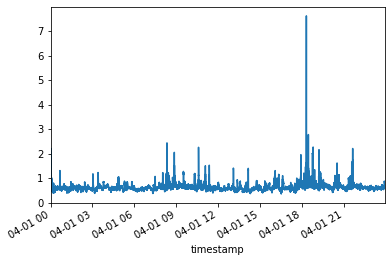

In [104]:
df_fut2['spreadNew'].rolling(window=1000).mean().plot()

In [115]:
a=0.5 #if less than buy
b=1 #if greater than sell

df_fut2['here_buy']=(df_fut2['spreadNew']<=a).astype(int)
df_fut2['here_sell']=(df_fut2['spreadNew']>=b).astype(int)
loss=(df_fut2['here_buy']*df_fut2['b_price']).sum()
profit=(df_fut2['here_sell']*df_fut2['s_price']).sum()
tek_amt=df_fut2['here_buy'].sum()-df_fut2['here_sell'].sum()
last_buy_price=df_fut2[df_fut2['side']==1]['price'][-1]
last_sell_price=df_fut2[df_fut2['side']==-1]['price'][-1]
last_middle_price=(last_buy_price+last_sell_price)/2
pnl=profit-loss+tek_amt*last_middle_price
pnl

-2443231.4749990404

In [119]:
def get_pnl(a,b):
    df_fut2['here_buy']=(df_fut2['spreadNew']<=a).astype(int)
    df_fut2['here_sell']=(df_fut2['spreadNew']>=b).astype(int)
    loss=(df_fut2['here_buy']*df_fut2['b_price']).sum()
    profit=(df_fut2['here_sell']*df_fut2['s_price']).sum()
    tek_amt=df_fut2['here_buy'].sum()-df_fut2['here_sell'].sum()
    last_buy_price=df_fut2[df_fut2['side']==1]['price'][-1]
    last_sell_price=df_fut2[df_fut2['side']==-1]['price'][-1]
    last_middle_price=(last_buy_price+last_sell_price)/2
    pnl=profit-loss+tek_amt*last_middle_price
    return pnl,(df_fut2['here_buy']-df_fut2['here_sell']).cumsum().max()

In [120]:
for a in [0.1,0.3,0.5,0.7,1,1.5,2]:
    for b in [0.1,0.3,0.5,0.7,1,1.5,2]:
        if (a <b):
            print(a,b,get_pnl(a,b))

0.1 0.3 (-8533172.519999623, -1)
0.1 0.5 (-7351887.655000448, -1)
0.1 0.7 (-6303344.1950003505, -1)
0.1 1 (-5082600.889999211, -1)
0.1 1.5 (7050439.809999943, 273117)
0.1 2 (7722596.955000043, 299261)
0.3 0.5 (-5890180.635000527, -1)
0.3 0.7 (-4841637.175000429, -1)
0.3 1 (-3620893.86999923, -1)
0.3 1.5 (8512146.829999924, 332962)
0.3 2 (9184303.975000024, 359107)
0.5 0.7 (-3663974.7800002694, -1)
0.5 1 (-2443231.4749990404, -1)
0.5 1.5 (9689809.225000143, 381496)
0.5 2 (10361966.370000124, 407642)
0.7 1 (-1399622.0749993771, 581)
0.7 1.5 (10733418.624999762, 424675)
0.7 2 (11405575.769999862, 450822)
1 1.5 (22846338.884999752, 892573)
1 2 (23518496.02999997, 918720)
1.5 2 (24815339.494998693, 973783)


In [121]:
973783*(1969.53-1923.07)

45241958.18000004